In [14]:
# import packages
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import pickle, os

In [29]:
# import csv
data = pd.read_csv("data/data-preprocessing.csv")
data

,text,label
0,pt mkios,Penipuan
1,mkios home,Penipuan
2,hadiah isi ulang mkios,Penipuan
3,mkios telkomsel,Penipuan
4,mkios murah,Penipuan
...,...,...
2453,kabar kini bogor hujan,Bersih
2454,berita baru pikir rakyat bogor,Bersih
2455,open data bogor login,Bersih
2456,bogor news portal media online luar negeri,Bersih


In [30]:
# menghapus data null
data.dropna(inplace=True)

In [31]:
# jumlah data perlabel
data["label"].value_counts()

label
porno       780
Judi        695
Bersih      503
Penipuan    468
Name: count, dtype: int64

In [32]:
data.count()

text     2446
label    2446
dtype: int64

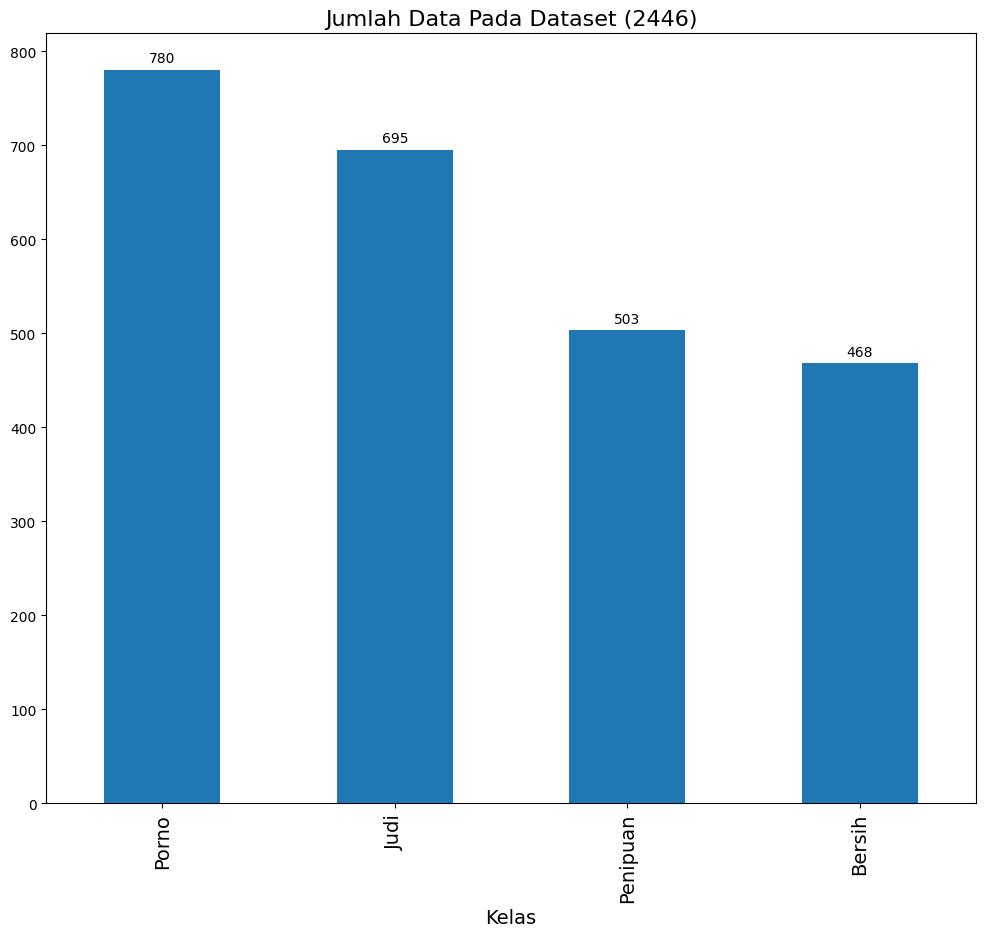

Jumlah data pada dataset 2446


In [33]:
x = data.text
y = data.label

data_count = y.value_counts()

freq_series = pd.Series(data_count)

x_labels = ['Porno','Judi', 'Penipuan', 'Bersih']

# Plot the figure.
plt.figure(figsize=(12, 10))
ax = freq_series.plot(kind="bar")
ax.set_title(f"Jumlah Data Pada Dataset ({y.count()})", size=16)
ax.set_xlabel("Kelas", size=14)
ax.set_xticklabels(x_labels, size=14)

rects = ax.patches


labels = [f"{i}" for i in data_count]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

print("Jumlah data pada dataset", y.count())

In [34]:
# split data dengan k fold cross validation
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

kf=KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [35]:
# split data dengan k fold cross validation
 
i = 0

for train_index, test_index in kf.split(x):
    i += 1
    print("Fold ", i)
    print("TEST :", test_index)
    print("TRAIN :", train_index)

print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

Fold  1
TEST : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242

In [36]:
# hasil k fold cross validation
print("Jumlah data latih : ", x_train.count())
print("Jumlah data uji : ", x_test.count())

Jumlah data latih :  1834
Jumlah data uji :  612


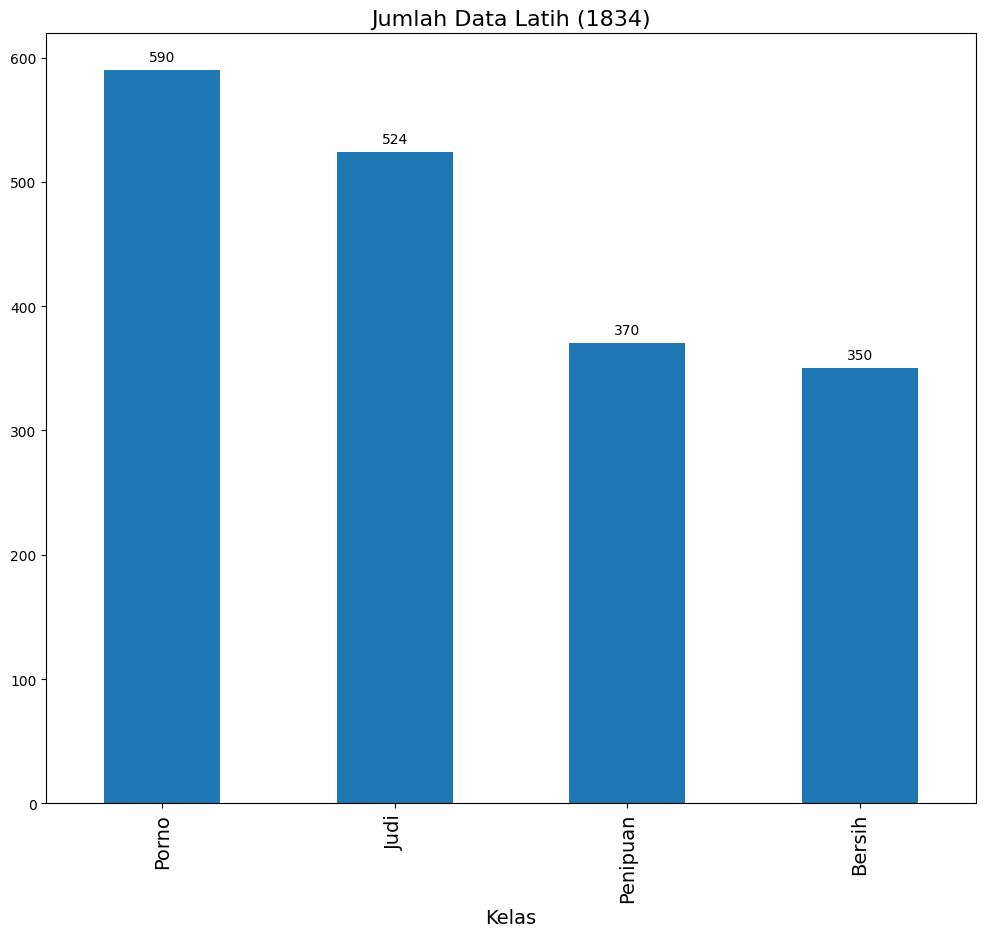

Jumlah Data Latih :  1834


In [37]:
data_count = y_train.value_counts()

freq_series = pd.Series(data_count)

x_labels = ['Porno','Judi', 'Penipuan', 'Bersih']

# Plot the figure.
plt.figure(figsize=(12, 10))
ax = freq_series.plot(kind="bar")
ax.set_title(f"Jumlah Data Latih ({y_train.count()})", size=16)
ax.set_xlabel("Kelas", size=14)
ax.set_xticklabels(x_labels, size=14)

rects = ax.patches


labels = [f"{i}" for i in data_count]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()
print("Jumlah Data Latih : ", y_train.count())

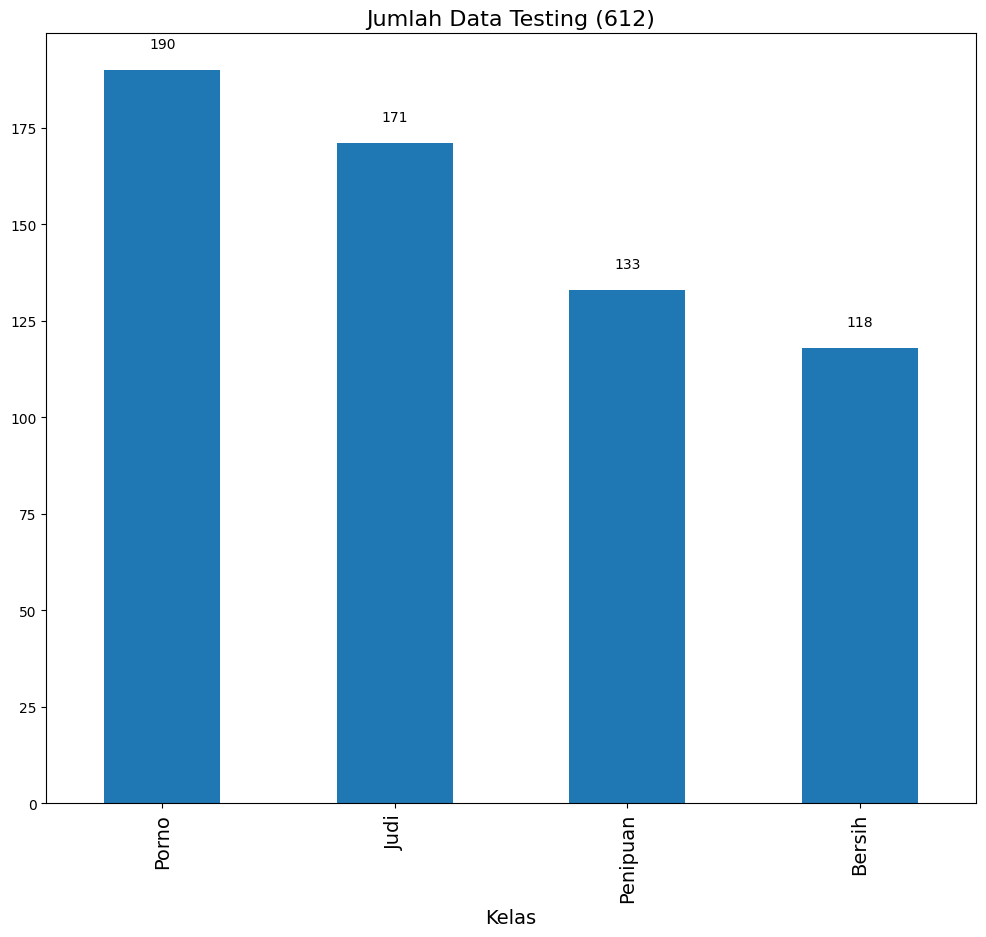

Data Uji :  612


In [38]:
data_count = y_test.value_counts()

freq_series = pd.Series(data_count)

x_labels = ['Porno','Judi', 'Penipuan', 'Bersih']

# Plot the figure.
plt.figure(figsize=(12, 10))
ax = freq_series.plot(kind="bar")
ax.set_title(f"Jumlah Data Testing ({y_test.count()})", size=16)
ax.set_xlabel("Kelas", size=14)
ax.set_xticklabels(x_labels, size=14)

rects = ax.patches


labels = [f"{i}" for i in data_count]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

print("Data Uji : ", y_test.count())

In [39]:
# Proses Training
# Feature enginering
vectorizer =TfidfVectorizer()
vectorizer.fit(x_train)

#tfidf training
tfidf_train = vectorizer.transform(x_train)

#tfidf testing
tfidf_test = vectorizer.transform(x_test)

# for i in tfidf_train:
#     print(i)

print(tfidf_train)
# tfidf_train

  (0, 929)	0.8575633139204399
  (0, 418)	0.3813099730152927
  (0, 316)	0.34523595858031625
  (1, 1080)	0.7032462804119315
  (1, 356)	0.7109463194129236
  (2, 1495)	0.516946224283364
  (2, 605)	0.6493165899854149
  (2, 551)	0.5578123046051302
  (3, 1750)	0.7596257573788067
  (3, 1313)	0.6503604452353128
  (4, 551)	0.5581279853617288
  (4, 215)	0.8297548746202447
  (5, 1495)	0.35831872032716894
  (5, 1070)	0.17760898984270193
  (5, 657)	0.15827104149646976
  (5, 418)	0.26956160054708544
  (5, 316)	0.8542085822957154
  (5, 219)	0.11259334019654711
  (6, 1805)	0.3215104421014292
  (6, 991)	0.6672286559167502
  (6, 547)	0.6104339339285142
  (6, 219)	0.28072650151317924
  (7, 1308)	0.7456957502704316
  (7, 1182)	0.17638548079606478
  (7, 823)	0.2363734031901058
  :	:
  (1828, 1310)	0.3537788228672435
  (1828, 683)	0.24905157638390057
  (1828, 628)	0.7361122498906436
  (1828, 440)	0.21938167244968526
  (1828, 381)	0.1837561797551757
  (1828, 55)	0.23150086271435966
  (1829, 1718)	0.5161910844

In [40]:
x_train.iloc[417]

'kursi bandar seru'

In [41]:
# Tunning parameter (Hyperparameter)
# Mencari nilai k terbaik
# Dengan range 1 -> 10
k_range = range(1,11)
k_score = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn, tfidf_train, y_train, cv=10, scoring='accuracy')
    k_score.append(score.mean())
num = 0
for i in k_score:
    num += 1
    print(f"k-[{num}] : {i}")
print(f"Nilai Tertinggi {max(k_score)}")

k-[1] : 0.9214748158707531
k-[2] : 0.9280084343074366
k-[3] : 0.9269185079591352
k-[4] : 0.9312752435257782
k-[5] : 0.9269125683060111
k-[6] : 0.9241832976954146
k-[7] : 0.9203700403896414
k-[8] : 0.923084461867427
k-[9] : 0.9214510572582562
k-[10] : 0.9225498930862438
Nilai Tertinggi 0.9312752435257782


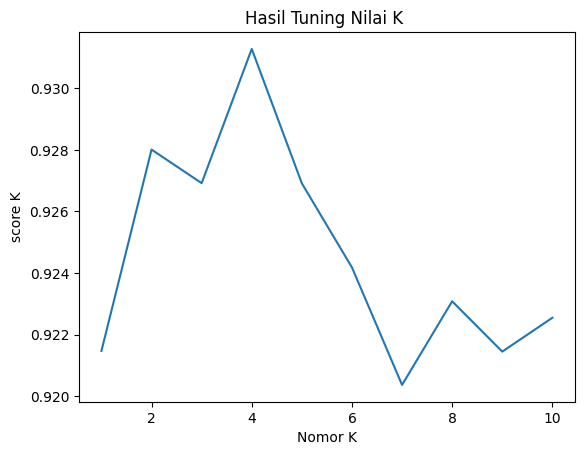

In [42]:

plt.plot(k_range, k_score)
plt.title("Hasil Tuning Nilai K ")

plt.xlabel('Nomor K')
plt.ylabel('score K')
plt.show()


In [44]:
# save feature enginering
with open('../web/data/tfidf.txt', 'wb') as file:
    pickle.dump(vectorizer, file)

In [77]:
# Pemodelan
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(tfidf_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [78]:
# prediksi data testing
y_pred = knn.predict(tfidf_test)
y_pred

array(['Bersih', 'Bersih', 'Penipuan', 'Judi', 'Judi', 'Penipuan',
       'Penipuan', 'porno', 'Penipuan', 'porno', 'Judi', 'Judi', 'Judi',
       'Bersih', 'porno', 'Penipuan', 'porno', 'Penipuan', 'Bersih',
       'Judi', 'porno', 'Penipuan', 'Penipuan', 'Bersih', 'porno',
       'porno', 'Bersih', 'Bersih', 'Bersih', 'Penipuan', 'Judi', 'Judi',
       'Penipuan', 'Penipuan', 'Penipuan', 'Penipuan', 'porno', 'Judi',
       'porno', 'Bersih', 'Penipuan', 'Judi', 'Judi', 'Penipuan', 'Judi',
       'Penipuan', 'porno', 'Judi', 'Judi', 'Judi', 'Bersih', 'porno',
       'Bersih', 'Judi', 'Penipuan', 'Penipuan', 'porno', 'Bersih',
       'Judi', 'Penipuan', 'Judi', 'Judi', 'porno', 'Judi', 'Penipuan',
       'porno', 'Bersih', 'Bersih', 'porno', 'Judi', 'porno', 'Bersih',
       'porno', 'Bersih', 'Bersih', 'Judi', 'porno', 'Penipuan', 'Judi',
       'Bersih', 'Judi', 'porno', 'porno', 'porno', 'Bersih', 'Penipuan',
       'Penipuan', 'Penipuan', 'Judi', 'Bersih', 'Bersih', 'porno',
      

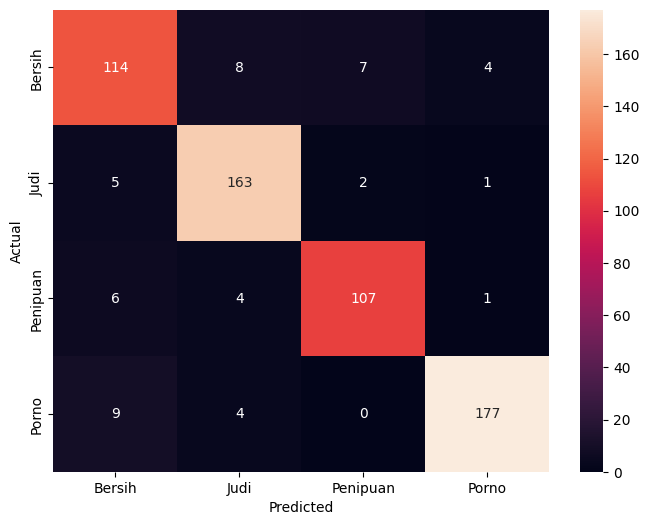

In [79]:
# confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
             xticklabels=["Bersih", "Judi", "Penipuan", "Porno"], yticklabels=["Bersih", "Judi", "Penipuan", "Porno"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('gambarplot.png', transparent='True')
plt.show()

In [80]:
# melihat akurasi training dan testing
print("KNN Accuracy Score training : ",accuracy_score(y_train, knn.predict(tfidf_train))*100)
print("KNN Accuracy Score testing : ",accuracy_score(y_test, y_pred)*100)

KNN Accuracy Score training :  96.56488549618321
KNN Accuracy Score testing :  91.66666666666666


In [81]:
#klasifikasi report testing
print("klasifikasi report")
print(classification_report(y_test, y_pred))

klasifikasi report
              precision    recall  f1-score   support

      Bersih       0.85      0.86      0.85       133
        Judi       0.91      0.95      0.93       171
    Penipuan       0.92      0.91      0.91       118
       porno       0.97      0.93      0.95       190

    accuracy                           0.92       612
   macro avg       0.91      0.91      0.91       612
weighted avg       0.92      0.92      0.92       612



In [85]:
# save model
os.makedirs("model", exist_ok=True)
pickle.dump(model, open("../web/model/model.pkl", "wb")) # write binary == wb

In [87]:
model = pickle.load(open("../web/model/model.pkl", "rb")) #read binary

In [62]:
from bs4 import BeautifulSoup as bs
import requests 

url = 'unpak.ac.id'
page = requests.get('http://'+url)
bs = bs(page.content, 'html.parser')
bs = bs.get_text(separator=" ", strip=True)
bs

"Universitas Pakuan Perpustakaan Pusat | SIMAK | Journal | E-Learning | ePrints | Arsip Berita | Brosur 🔍︎ Cari.. Beranda Profil Tentang Kami Sejarah Visi dan Misi Unsur Pimpinan Ciri Dasar Kehidupan Identitas Logo Unpak Wangsit Siliwangi Mars Universitas Pakuan Hymne Universitas Pakuan Lembaga BAAK LPM LPPM KUIPK PUTIK UNPAK PRESS HUMAS & PROMOSI Program Studi Sekolah Vokasi Sarjana (Strata-S1) Sekolah pascasarjana Fakultas Fakultas Hukum Fakultas Ekonomi & Bisnis FKIP FISIB Fakultas Teknik FMIPA Sekolah Pascasarjana Sekolah Vokasi Perkuliahan Pengumuman Lulus PMB Gelombang 4 Kalender & Jadwal SIMAK Her-Registrasi Perkuliahan Perbaikan Identitas SIMAK Kebijakan Kegiatan Akademik Gasal Kemahasiswaan Informasi Fakultas Prestasi Mahasiswa Karya Ilmiah Mahasiswa Unit Kegiatan Mahasiswa Form Prestasi Mahasiswa Pendaftaran Informasi Pendaftaran Program Akademik RPL Layanan Partner Beasiswa Brosur PMB Brosur Program RPL Panduan Pembayaran Eprints Unpak Elearning Unpak Repository Unpak Salura

In [63]:
text = "UNPAK - Universitas Pakuan UNPAK TV | SIMAK | SIUP | JOURNAL | LMS UNPAK | BROSUR | ARSIP S I G A P Beranda Profil Tentang Kami Sejarah Visi dan Misi Unsur Pimpinan Ciri Dasar Kehidupan Unpak Identitas Logo Unpak Wangsit Siliwangi Mars Universitas Pakuan Hymne Universitas Pakuan Lembaga BAAK LPM LPPM KUIPK PUTIK Program Studi Sekolah Vokasi Sarjana (Strata-S1) Sekolah pascasarjana Fakultas Fakultas Hukum Fakultas Ekonomi & Bisnis FKIP FISIB Fakultas Teknik FMIPA Sekolah Pascasarjana Sekolah Vokasi Perkuliahan Pengumuman Lulus PMB Gelombang 2 Kalender & Jadwal SIMAK Surat Edaran SPP Genap 2021 Her-Registrasi Perkuliahan Perbaikan Identitas SIMAK Kemahasiswaan Informasi Fakultas Prestasi Mahasiswa Karya Ilmiah Mahasiswa Unit Kegiatan Mahasiswa Form Prestasi Mahasiswa Info Pendaftaran Layanan Partner Beasiswa Brosur PMB Journal Online Elearning Unpak Repository Unpak Saluran Unpak TV Saluran Unpak Story Panduan KRS Online Panduan Check Nilai Lowongan Kerja Unpak Program Pedoman PKM Jabatan Akademik Dosen Alumni Kuesioner Online Feedback Pengguna Raihlah cita-cita untuk kebaikan di masa yang akan datang. Mari bergabung menjadi Insan Unggul, Mandiri & Berkarakter."
encoded_string = text.encode("ascii", "ignore")
decode_string = encoded_string.decode()
print(encoded_string)


b'UNPAK - Universitas Pakuan UNPAK TV | SIMAK | SIUP | JOURNAL | LMS UNPAK | BROSUR | ARSIP S I G A P Beranda Profil Tentang Kami Sejarah Visi dan Misi Unsur Pimpinan Ciri Dasar Kehidupan Unpak Identitas Logo Unpak Wangsit Siliwangi Mars Universitas Pakuan Hymne Universitas Pakuan Lembaga BAAK LPM LPPM KUIPK PUTIK Program Studi Sekolah Vokasi Sarjana (Strata-S1) Sekolah pascasarjana Fakultas Fakultas Hukum Fakultas Ekonomi & Bisnis FKIP FISIB Fakultas Teknik FMIPA Sekolah Pascasarjana Sekolah Vokasi Perkuliahan Pengumuman Lulus PMB Gelombang 2 Kalender & Jadwal SIMAK Surat Edaran SPP Genap 2021 Her-Registrasi Perkuliahan Perbaikan Identitas SIMAK Kemahasiswaan Informasi Fakultas Prestasi Mahasiswa Karya Ilmiah Mahasiswa Unit Kegiatan Mahasiswa Form Prestasi Mahasiswa Info Pendaftaran Layanan Partner Beasiswa Brosur PMB Journal Online Elearning Unpak Repository Unpak Saluran Unpak TV Saluran Unpak Story Panduan KRS Online Panduan Check Nilai Lowongan Kerja Unpak Program Pedoman PKM Jaba